
# Quick Predictive Maintenance Project (CWRU-style dataset)

This notebook trains a **machine learning model for predictive maintenance** using a tabular feature dataset
(e.g. features extracted from vibration / sensor signals).

You can plug in:
- Your own CSV file with features
- A label column (e.g. `label`, `target`, `class`, etc.)

> 🔧 **Instructions:**  
> 1. Put your CSV file in a folder like `../data/` relative to this notebook.  
> 2. Update the `CSV_PATH` and `LABEL_COL` variables in the next cell.  
> 3. Run all cells from top to bottom.


In [11]:
# Install dependencies if needed (uncomment if running somewhere fresh)
# !pip install numpy pandas scipy scikit-learn matplotlib seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



## 1. Load Dataset

Set the path to your feature CSV and the name of the label column.


In [12]:
# === CONFIGURATION ===
# Adjust these to match your setup
CSV_PATH = "../data/processed/feature_time_48k_2048_load_1.csv"  # <-- change if needed
LABEL_COL = "fault"   # <-- change to your label column name if different

# =====================

assert os.path.exists(CSV_PATH), f"CSV file not found at: {CSV_PATH}"

df = pd.read_csv(CSV_PATH)
print("DataFrame shape:", df.shape)
df.head()


DataFrame shape: (2300, 10)


,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1



## 2. Basic Exploration

Let's inspect the columns, label distribution, and check for missing values.


In [13]:
print("Columns in dataset:")
print(df.columns.tolist())

print("\nSample of label values (first 20):")
print(df[LABEL_COL].head(20))

print("\nLabel distribution:")
print(df[LABEL_COL].value_counts())

print("\nMissing values per column (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))


Columns in dataset:
['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form', 'fault']

Sample of label values (first 20):
0     Ball_007_1
1     Ball_007_1
2     Ball_007_1
3     Ball_007_1
4     Ball_007_1
5     Ball_007_1
6     Ball_007_1
7     Ball_007_1
8     Ball_007_1
9     Ball_007_1
10    Ball_007_1
11    Ball_007_1
12    Ball_007_1
13    Ball_007_1
14    Ball_007_1
15    Ball_007_1
16    Ball_007_1
17    Ball_007_1
18    Ball_007_1
19    Ball_007_1
Name: fault, dtype: object

Label distribution:
fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
IR_007_1      230
IR_014_1      230
IR_021_1      230
OR_007_6_1    230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Name: count, dtype: int64

Missing values per column (top 20):
max         0
min         0
mean        0
sd          0
rms         0
skewness    0
kurtosis    0
crest       0
form        0
fault       0
dtype: int64



## 3. Train / Test Split

We separate features `X` and labels `y`, then split into train and test sets.


In [14]:
# Separate features and labels
X = df.drop(columns=[LABEL_COL])
y = df[LABEL_COL]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Feature matrix shape: (2300, 9)
Target shape: (2300,)
Train size: 1840
Test size: 460



## 4. Train a Random Forest Model

Random Forests are a strong classical baseline for tabular predictive maintenance data.


In [15]:
# Define and train model
model = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

model.fit(X_train, y_train)

print("Model trained!")


Model trained!



## 5. Evaluation: Classification Report & Confusion Matrix


=== Classification Report ===
              precision    recall  f1-score   support

  Ball_007_1       0.98      0.87      0.92        46
  Ball_014_1       0.98      0.89      0.93        46
  Ball_021_1       0.88      0.80      0.84        46
    IR_007_1       1.00      1.00      1.00        46
    IR_014_1       1.00      1.00      1.00        46
    IR_021_1       0.94      1.00      0.97        46
    Normal_1       1.00      1.00      1.00        46
  OR_007_6_1       0.98      1.00      0.99        46
  OR_014_6_1       0.76      0.91      0.83        46
  OR_021_6_1       0.98      0.98      0.98        46

    accuracy                           0.95       460
   macro avg       0.95      0.95      0.95       460
weighted avg       0.95      0.95      0.95       460



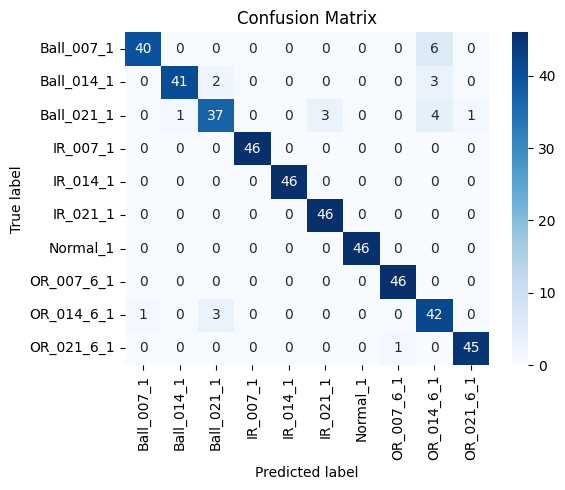

In [16]:
# Predictions
y_pred = model.predict(X_test)

# Text report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()



## 6. Feature Importance

This helps understand which features contribute most to the model's decisions.


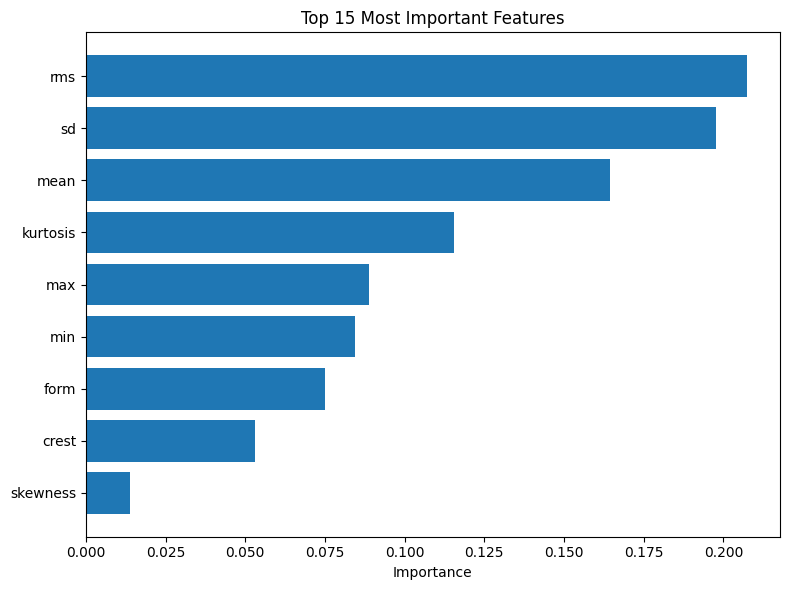

In [17]:
importances = model.feature_importances_
feature_names = X.columns

# Get indices of top 15 features
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 15 Most Important Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



## 7. Save Model (Optional)

You can save the trained model for later use (e.g. deployment in an API or app).


In [18]:
# Optional: save model to disk using joblib
from joblib import dump

OUTPUT_DIR = "../results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

model_path = os.path.join(OUTPUT_DIR, "random_forest_predictive_maintenance.joblib")
dump(model, model_path)

print(f"Model saved to: {model_path}")


Model saved to: ../results\random_forest_predictive_maintenance.joblib



## 8. Next Steps (for Portfolio Polish)

To turn this into a **portfolio-ready project**, you can:

- Add a short **project description** (problem, dataset, method, results) to your README.
- Include **plots** from this notebook (confusion matrix, feature importance) in a `results/` folder.
- Explain **why predictive maintenance matters** for industry (reliability, downtime reduction, cost savings).
- Optionally, build a small **Streamlit** or **Flask/FastAPI** app to demo predictions.

This notebook already gives you a solid baseline predictive maintenance project that you can show to employers.
